Preparing notebook

In [74]:
%load_ext autoreload
%autoreload 2

seed: int = 42
import numpy as np
import random
import mxnet
import pandas as pd

np.random.seed(seed)
random.seed(seed)

print(f"GPUs available {mxnet.context.num_gpus()}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
GPUs available 1


Loading data for exploration. Some considerations:
* We are replacing missing values with linear interpolation.
* No resampling performed. It appears to be every two hours

In [75]:
import insight_lander

martian_days_threshold: float = 7354.583 # For a single martian year
timestamp_threshold: pd.Timestamp = pd.Timestamp(year=2019, month=4,day=1)
data_frame = insight_lander.get_dataset()
data_frame = data_frame.query(f"martian_days <= {martian_days_threshold}")
data_frame = data_frame[data_frame.index < timestamp_threshold]
data_frame = data_frame
data_frame.head(100)

Missing values
martian_days                  0
solar_longitude               0
local_time                    0
assim_surface_pressure        0
assim_eastwind_speed          0
assim_northwind_speed         0
assim_dust_opticaldepth       0
assim_air_temperature         0
surface_pressure           1119
air_temperature            1807
eastward_wind_speed        1993
northward_wind_speed       1993
dtype: int64


,martian_days,solar_longitude,local_time,assim_surface_pressure,assim_eastwind_speed,assim_northwind_speed,assim_dust_opticaldepth,assim_air_temperature,surface_pressure,air_temperature,eastward_wind_speed,northward_wind_speed
observation_time,,,,,,,,,,,,
2018-12-17 12:32:00,7261.083,307.968,9,754.965,-9.575,6.376,0.397,194.534,757.030,205.157,3.363,4.349
2018-12-17 14:35:00,7261.167,308.018,11,727.660,-9.070,4.206,0.397,198.137,743.842,226.743,3.562,1.863
2018-12-17 16:38:00,7261.250,308.068,13,716.942,-8.358,0.466,0.397,200.567,732.172,243.768,-4.139,6.710
2018-12-17 18:41:00,7261.333,308.119,15,715.132,-7.416,-2.551,0.397,197.131,721.586,248.897,4.757,-4.860
2018-12-17 20:45:00,7261.417,308.169,17,733.721,-3.493,-2.320,0.397,193.254,714.435,240.921,1.888,-5.626
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-25 15:39:00,7269.000,312.706,7,759.110,2.590,4.622,0.437,192.049,756.644,175.885,2.786,2.473
2018-12-25 17:42:00,7269.083,312.755,9,750.480,-4.713,2.786,0.437,189.910,760.480,205.408,8.474,1.502
2018-12-25 19:46:00,7269.167,312.805,11,718.853,-1.628,-0.481,0.437,190.684,750.897,224.881,1.353,6.293


General data information

In [76]:
data_frame.describe()

,martian_days,solar_longitude,local_time,assim_surface_pressure,assim_eastwind_speed,assim_northwind_speed,assim_dust_opticaldepth,assim_air_temperature,surface_pressure,air_temperature,eastward_wind_speed,northward_wind_speed
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000
mean,7306.328073,333.819922,12.022277,728.530215,0.742370,0.161233,0.622236,199.220207,727.173563,210.736194,2.816676,-0.303722
std,28.113475,15.659034,6.871416,21.709076,3.658948,4.308028,0.339640,8.344918,19.711925,25.689864,3.440201,2.981508
min,7261.083000,307.968000,1.000000,668.361000,-14.162000,-12.075000,0.341000,183.829000,669.456000,175.325000,-11.921000,-9.243000
25%,7277.896000,317.956000,7.000000,716.921500,-1.602250,-3.016000,0.453000,192.729500,712.235000,186.911750,1.435500,-2.430500
50%,7303.458500,332.604500,13.000000,732.624000,1.237000,0.359500,0.519000,198.252000,730.310500,204.916842,3.522500,-0.795000
75%,7329.020750,346.603250,17.000000,741.714750,3.391000,3.283250,0.614500,204.045250,742.301000,239.158750,4.977071,2.326250
max,7354.583000,359.992000,23.000000,778.720000,11.670000,11.389000,2.210000,231.866000,767.729000,266.439000,11.537000,7.231000


Inspecting the time dimension, to explore time frequency

In [77]:
grouped_by_time = data_frame.groupby(["martian_days", "solar_longitude", "local_time"]).size()
grouped_by_time = grouped_by_time.sort_values(ascending=False)
grouped_by_time

martian_days  solar_longitude  local_time
7261.083      307.968          9             1
7323.750      343.768          1             1
7322.917      343.318          5             1
7323.000      343.363          7             1
7323.083      343.408          9             1
                                            ..
7292.500      326.405          19            1
7292.583      326.453          21            1
7292.667      326.500          23            1
7292.750      326.548          1             1
7354.583      359.992          21            1
Length: 808, dtype: int64

General dataframe information

In [78]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 808 entries, 2018-12-17 12:32:00 to 2019-03-23 12:55:00
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   martian_days             808 non-null    float64
 1   solar_longitude          808 non-null    float64
 2   local_time               808 non-null    int64  
 3   assim_surface_pressure   808 non-null    float64
 4   assim_eastwind_speed     808 non-null    float64
 5   assim_northwind_speed    808 non-null    float64
 6   assim_dust_opticaldepth  808 non-null    float64
 7   assim_air_temperature    808 non-null    float64
 8   surface_pressure         808 non-null    float64
 9   air_temperature          808 non-null    float64
 10  eastward_wind_speed      808 non-null    float64
 11  northward_wind_speed     808 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 82.1 KB


Counting NULL values

Querying the time range, to check for well-known dust storm events

In [79]:
print(f"Minimum value {data_frame.index.min()}")
print(f"Maximum value {data_frame.index.max()}")

Minimum value 2018-12-17 12:32:00
Maximum value 2019-03-23 12:55:00


**Question to Kylash:** Is there a well-know dust storm between 2018 and 2021?`

**Note** If global-scale dust storms are really infrequent, we definitely need more data.


Plotting the time series, looking for evidence of dust storms.

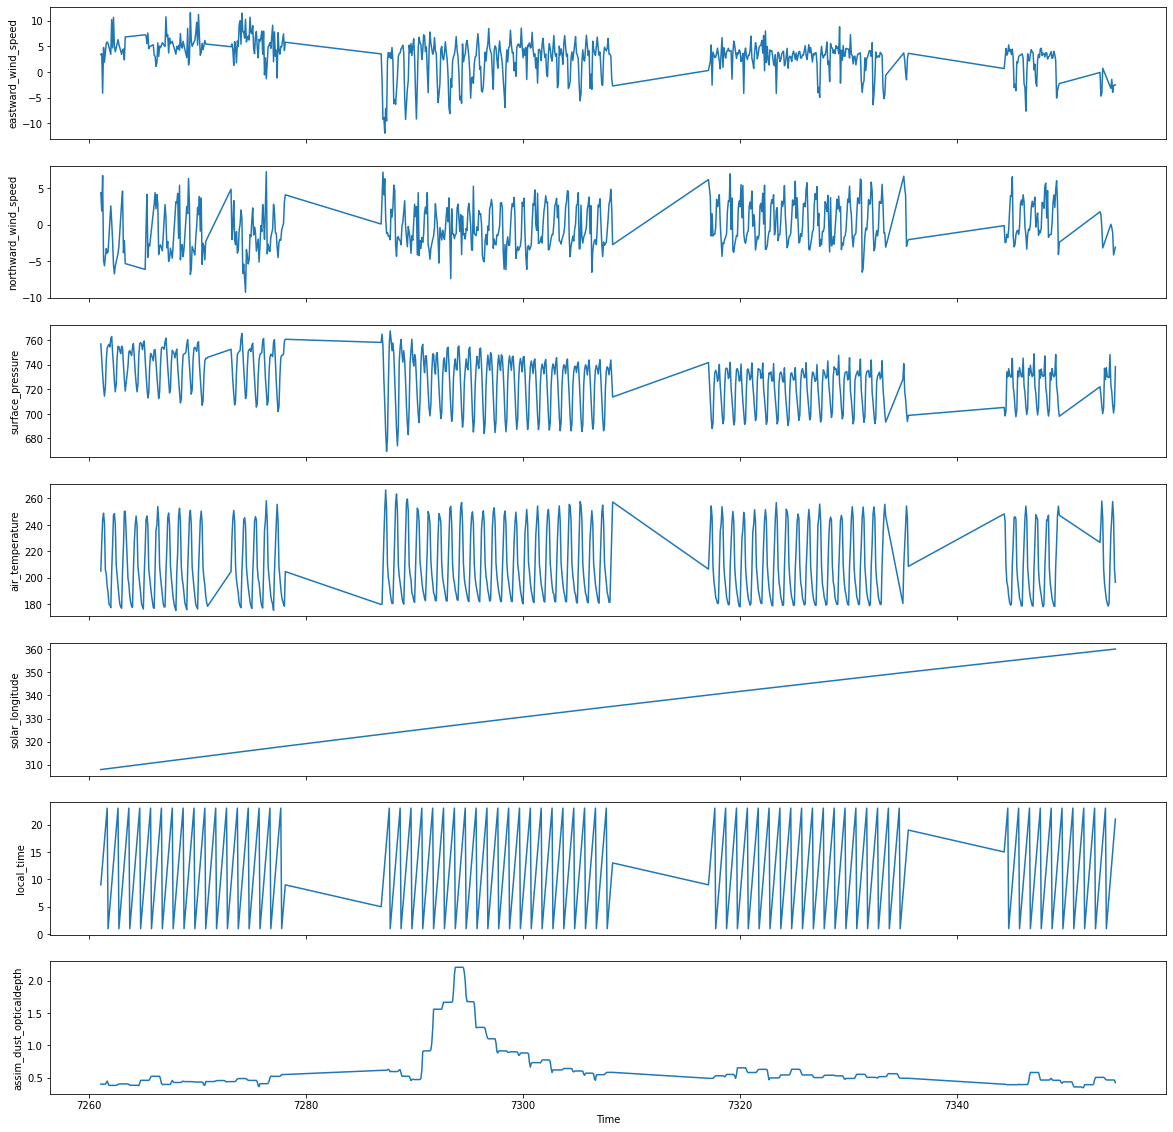

In [80]:
from typing import List

target_columns: List[str] = [
    "eastward_wind_speed",
    "northward_wind_speed",
    "surface_pressure",
    "air_temperature",
    "solar_longitude",
    "local_time",
    "assim_dust_opticaldepth"]

insight_lander.plot_time_series(dataframe=data_frame,
                                column_names=target_columns,
                                index_columns=["martian_days"])


Plotting using observation time

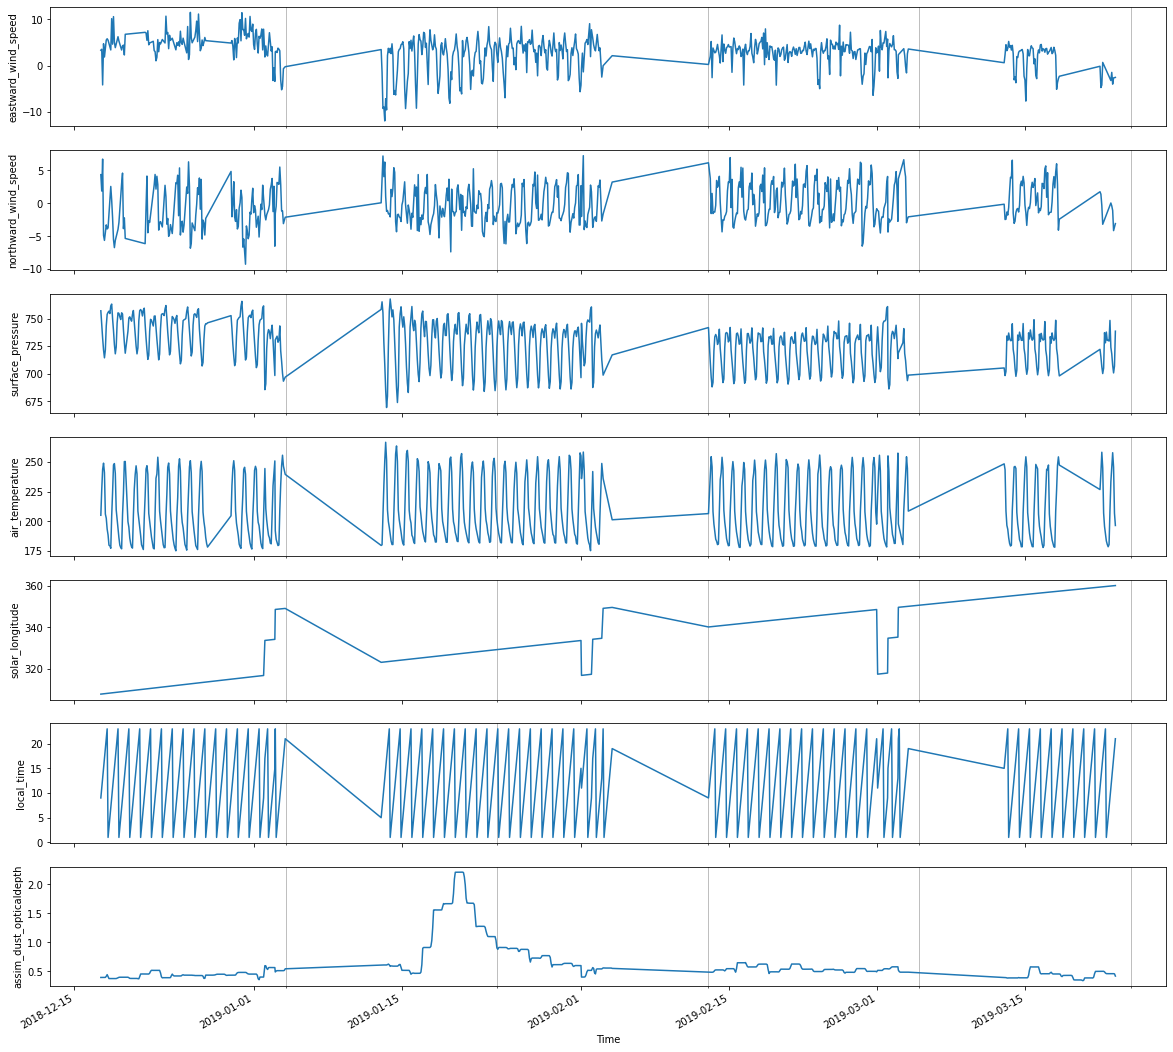

In [81]:
insight_lander.plot_time_series(dataframe=data_frame,
                                column_names=target_columns,
                                index_columns=[])

Now, we define our training and validation dataset. We will try to forecast 1-week values of CDOD

**TODO** Shall we better do this in MARS years?

In [82]:
from gluonts.dataset.common import ListDataset
import pandas as pd

frequency: str = "2H"
start_training: pd.Timestamp = pd.Timestamp(year=2018, month=12, day=15)
end_training: pd.Timestamp = pd.Timestamp(year=2019, month=1, day=15)

target_time_series: List[pd.Series] = [data_frame[target_column] for target_column in target_columns]
training_dataset: ListDataset
training_series, training_dataset = insight_lander.to_list_dataset(target_time_series,
                                                                   start_date=start_training,
                                                                   end_date=end_training,
                                                                   frequency=frequency)
# Only for visualization
training_series[-1]["target"]

observation_time
2018-12-17 12:32:00    0.397
2018-12-17 14:35:00    0.397
2018-12-17 16:38:00    0.397
2018-12-17 18:41:00    0.397
2018-12-17 20:45:00    0.397
                       ...  
2019-01-03 15:08:00    0.514
2019-01-03 17:12:00    0.514
2019-01-03 19:15:00    0.514
2019-01-03 21:18:00    0.519
2019-01-03 23:21:00    0.546
Name: assim_dust_opticaldepth, Length: 228, dtype: float64

Let's start generating a single test time series

In [83]:
from datetime import timedelta

prediction_days: int = 6 # From Optuna: 6
end_testing: pd.Timestamp = end_training + timedelta(days=prediction_days)
testing_series, testing_dataset = insight_lander.to_list_dataset(target_time_series,
                                                                 start_date=start_training,
                                                                 end_date=end_testing,
                                                                 frequency=frequency)
testing_series[-1]["target"]

observation_time
2018-12-17 12:32:00    0.397
2018-12-17 14:35:00    0.397
2018-12-17 16:38:00    0.397
2018-12-17 18:41:00    0.397
2018-12-17 20:45:00    0.397
                       ...  
2019-01-03 15:08:00    0.514
2019-01-03 17:12:00    0.514
2019-01-03 19:15:00    0.514
2019-01-03 21:18:00    0.519
2019-01-03 23:21:00    0.546
Name: assim_dust_opticaldepth, Length: 298, dtype: float64

**Starting the training process**
From "Atmospheric Dust on Mars: A Review", temperature, pressure and winds matter too.

First, we look for good hyperparameter values


In [84]:
from optuna.trial import FrozenTrial
from gluonts.model.predictor import Predictor
import deepar_forecast

# AWS recommends setting the same value for context and prediction lengths
# https://docs.aws.amazon.com/sagemaker/latest/dg/deepar.html
prediction_length: int = prediction_days * 12
context_length: int = prediction_length

epochs: int = 100
learning_rate: float = 1e-3
num_batches_per_epoch: int = 100
evaluation_samples: int = 100
batch_size: int = 32

optimize_parameters: bool = True
if optimize_parameters:
    optimization_trials: int = 10
    metric_type: str = "RMSE"
    trial: FrozenTrial = insight_lander.optimise_parameters(number_of_trials=optimization_trials,
                                                            learning_rate=learning_rate,
                                                            num_batches_per_epoch=num_batches_per_epoch,
                                                            training_dataset=training_dataset,
                                                            frequency=frequency,
                                                            metric_type=metric_type)
else:
    print("Skipping parameter optimisation...")


[I 2022-08-18 10:22:03,874] A new study created in memory with name: no-name-e5265e32-027a-4e7b-b53f-9a96877446bd
100%|██████████| 100/100 [00:13<00:00,  7.18it/s, epoch=10/10, avg_epoch_loss=1.82]
Running evaluation: 7it [00:00, 17.74it/s]
/home/cgc87/github/OpenMarsML/insight_lander.py:59: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  aggregate_metrics, item_metrics = evaluator(entry_futures, forecast_list)
/home/cgc87/anaconda3/envs/deepar-gluton-ts/lib/python3.7/site-packages/pandas/core/construction.py:759: UserWarning: Warning: converting a masked element to nan.
  subarr = np.array(arr, dtype=dtype, copy=copy)
[I 2022-08-18 10:24:24,836] Trial 0 finished with value: 44.30125449906671 and parameters: {'context_length': 24, 'batch_size': 512}. Best is trial 0 with value: 44.30125449906671.
100%|█

Finished 10
Best trial value 19.03065689562803
Best trial params: {'context_length': 12, 'batch_size': 32}
Optimization time: 895.4733190536499 s


Now, we start training

In [85]:
context_length = 12  # From Optuna: 12
prediction_length = context_length  # From Optuna: 12
batch_size = 32  # From Optuna: 32

if optimize_parameters:
    context_length = trial.params["context_length"]
    prediction_length = trial.params["context_length"]
    batch_size = trial.params["batch_size"]

predictor: Predictor = deepar_forecast.train_predictor(training_dataset=training_dataset,
                                                       prediction_length=prediction_length,
                                                       context_length=context_length,
                                                       epochs=epochs,
                                                       learning_rate=learning_rate,
                                                       num_batches_per_epoch=num_batches_per_epoch,
                                                       frequency=frequency,
                                                       batch_size=batch_size)

100%|██████████| 100/100 [00:01<00:00, 50.85it/s, epoch=100/100, avg_epoch_loss=0.93]


Model saved at models/


**Checking performance on the testing dataset**

Note that the resulting model is global, meaning it can predict all of the time series we provided as input.
However, we are going to focus on performance over `assim_dust_opticaldepth`, for its potential with
respect to dust storms.

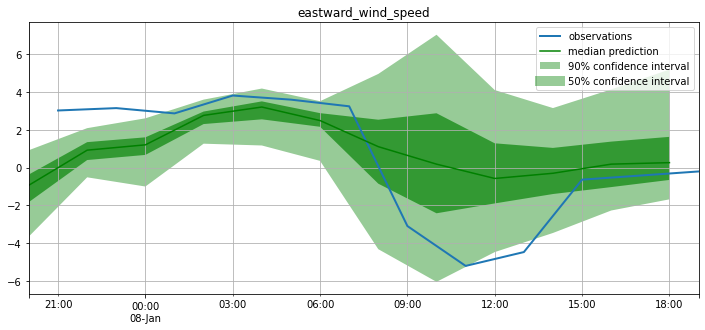

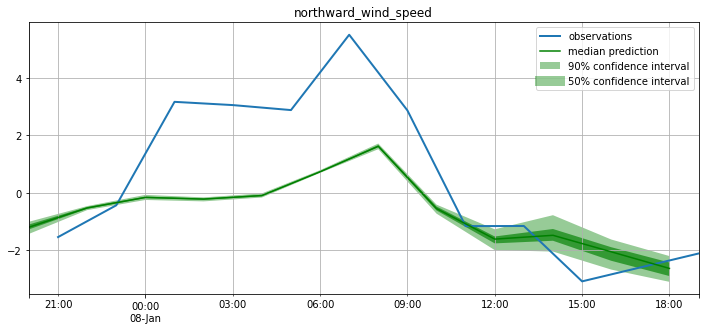

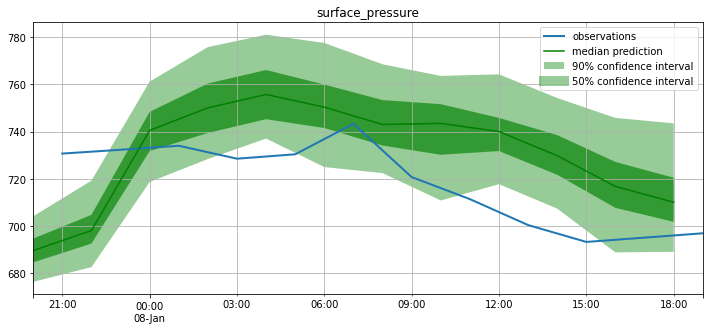

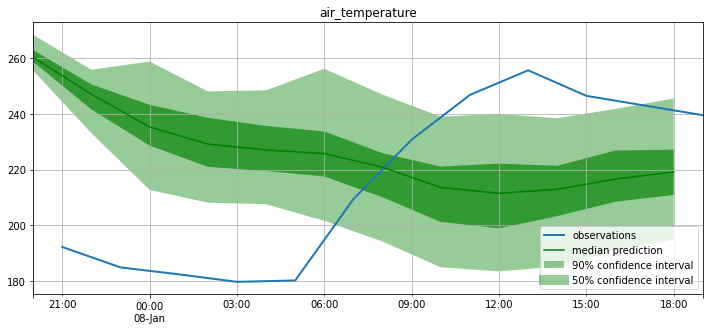

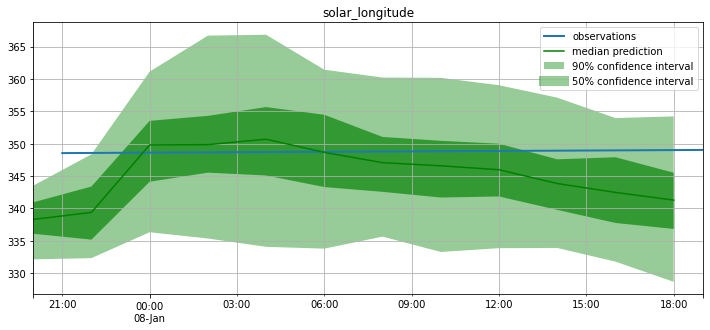

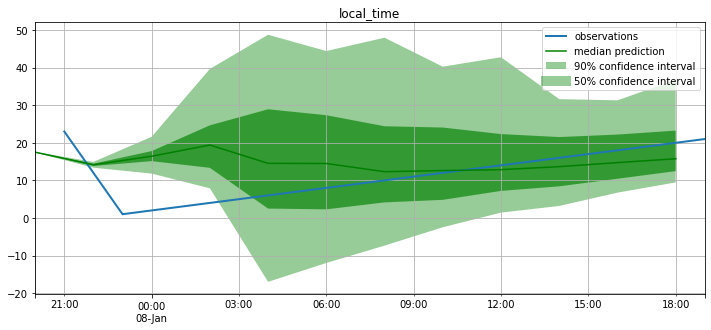

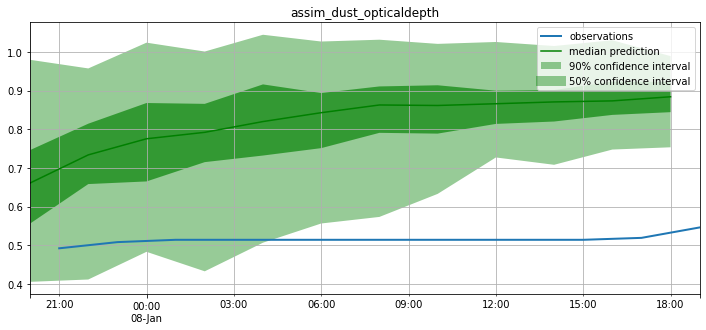

In [86]:
from deepar_forecast import plot_forecasts
from gluonts.model import Forecast
from typing import List
from gluonts.evaluation import make_evaluation_predictions

forecast_iterator, actual_iterator = make_evaluation_predictions(dataset=testing_dataset,
                                                                 predictor=predictor,
                                                                 num_samples=evaluation_samples)
forecast_list: List[Forecast] = list(forecast_iterator)
actual_list: List[pd.DataFrame] = list(actual_iterator)
plot_forecasts(actual_list, forecast_list, past_length=context_length, plots=len(target_columns) + 1)

Checking training metrics

In [87]:
from gluonts.evaluation import Evaluator

evaluator: Evaluator = Evaluator(quantiles=[0.5])
aggregate_metrics, item_metrics = evaluator(iter(actual_list), iter(forecast_list))
aggregate_metrics

Running evaluation: 7it [00:00, 17.86it/s]
/home/cgc87/anaconda3/envs/deepar-gluton-ts/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  after removing the cwd from sys.path.


{'MSE': 381.9545205632846,
 'abs_error': 938.5588703155518,
 'abs_target_sum': 15607.0055975914,
 'abs_target_mean': 185.7976856856119,
 'seasonal_error': 3.2016875572323924,
 'MASE': 3.333324754920714,
 'MAPE': 0.6056323500261421,
 'sMAPE': 0.4824423944311483,
 'MSIS': 50.50481255141814,
 'QuantileLoss[0.5]': 938.5589008629322,
 'Coverage[0.5]': 0.5595238095238095,
 'RMSE': 19.543656785854704,
 'NRMSE': 0.10518783758654836,
 'ND': 0.06013702400801328,
 'wQuantileLoss[0.5]': 0.060137025965299726,
 'mean_absolute_QuantileLoss': 938.5589008629322,
 'mean_wQuantileLoss': 0.060137025965299726,
 'MAE_Coverage': 0.059523809523809534,
 'OWA': nan}

Checking individual metrics

In [88]:
item_metrics

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,ND,MSIS,QuantileLoss[0.5],Coverage[0.5]
0,eastward_wind_speed,7.529283,24.871435,33.645550,2.803796,2.402751,0.862603,0.893818,1.239425,0.739219,5.652465,24.871438,0.500000
1,northward_wind_speed,4.901338,19.769192,29.560001,2.463333,2.597221,0.634306,0.565933,0.894266,0.668782,21.690345,19.769190,0.333333
2,surface_pressure,743.235596,301.028748,8617.343750,718.111979,7.976857,3.144814,0.035067,0.034784,0.034933,23.795034,301.028748,0.833333
3,air_temperature,1821.686198,462.784424,2590.770508,215.897542,7.336594,5.256577,0.189224,0.176131,0.178628,82.676749,462.784454,0.500000
4,solar_longitude,27.957942,50.203979,4185.508789,348.792399,1.126033,3.715402,0.011995,0.012109,0.011995,43.460919,50.203979,0.250000
5,local_time,68.284124,76.232864,144.000000,12.000000,0.788321,8.058567,1.950780,0.566004,0.529395,165.466333,76.232863,0.500000
6,assim_dust_opticaldepth,0.087164,3.668228,6.177000,0.514750,0.184036,1.661006,0.592609,0.454379,0.593853,10.791843,3.668228,1.000000


**Observations**
* For CDOD, using wind time series: 0.000122 MSE and 0.67 abs_error. On a second run, 0.000341 MSE and 1.306959 abs_error
* Including temperature and pressure: 0.000297 MSE and 1.010900 abs_error
* All features: 0.000385 MSE and 1.341332 abs_error.
* Wind and optimized parameters: 0.000099 MSE and 0.575846 abs_error